Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# DOMAĆI ZADATAK - zadatak 1
## april 2021. 

# Pavle Janevski 0055/2020

<font color='red'>
Preimenovati svesku u "domaci_zadatak_1_ime_prezime"<br></font>

# __Zadatak__: Sistemi sa pojavom histerezisa
Jedna od diferencijalnih jednačina koja ima veliku primenu u opisivanju određenih dinamičkih sistema u okviru ekonomije i biologije, ima formu:

\begin{equation}
    \frac{dx}{dt} = -x^3 + x + k
\end{equation}

a) Formirati Python definiciju <font color='blue'>zero_finder</font> koja pronalazi sva stacionarna rešenja jednačine u zavisnosti od parametra $k$. Pozivni parametri definicije treba da budu $k$, $x_{min}$ i $x_{max}$, odnosno vrednost parametra $k$ i opseg u kome se traže stacionarna rešenja (donja i gornja granica opsega). Definicija treba da vrati sve vrednosti promenljive $x$ koje predstavljaju stacionarna rešenja u zadatom opsegu za zadatu vrednost parametra $k$. 

Primeniti definiciju na tri slučaja: $k = -3, 0, 3$. Na istom grafiku, linijama različitih boja prikazati fazne dijagrame $dx/dt$ u funkciji od $x$ za opseg od $x_{min}$ do $x_{max}$ za tri zadate vrednosti parametra $k$. Obeležiti ose grafika, grafik nasloviti "fazni dijagram" i prikazati legendu oznaka. Isprekidanom horizontalnom linijom proizvoljne boje označiti osu $dx/dt = 0$. 

zero finder k = -3 : [-1.6716998816571609]
zero finder k = 0 : [-1.0000000000000087, -4.3138683437577794e-16, 1.0]
zero finder k = 3 : [1.6716998816571607]


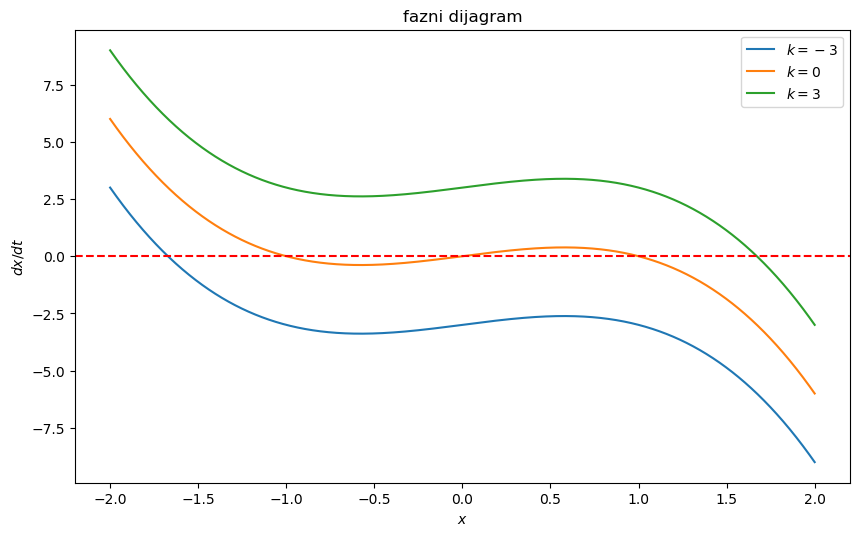

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, integrate

def foo(x,k):
    return -x**3 + x + k

def zero_finder(k,xmin,xmax):
    x = np.linspace(xmin, xmax, 3000)
    v = foo(x, k)
    s = np.sign(v)
    diff = np.diff(s)
    zeros = np.where(diff != 0)
    cnt = zeros[0].shape[0]
    r = []
    for i in range(cnt):
        r.append(optimize.newton(foo, x[zeros[0][i]], args=(k,)))
    return r

plt.figure(figsize=(10,6), dpi=100)
arr_k = [-3,0,3]
xmin = -2
xmax = 2
x = np.linspace(xmin, xmax, 3000)
for k in arr_k:
    res = zero_finder(k, xmin, xmax)
    plt.plot(x, foo(x, k), label="$k=" + str(k) + "$")
    print("zero finder k =", k, ":",res)
plt.legend()
plt.axhline(0, color='r', ls="--")
plt.xlabel("$x$")
plt.ylabel("$dx/dt$")
plt.title("fazni dijagram")
plt.show()

Komentarisati kako parametar $k$ utiče na broj stacionarnih stanja. 

$\epsilon=\frac{2\sqrt{3}}{9}$ (analiticki je odredjeno)
Za k = 0 postoje 3 stacionarnja stanja. Broj stacionarnih stanja je 3 sve dok vazi |k| < $\epsilon$. Za |k| = $\epsilon$ broj stacionarnih stanje je 2, dok je za |k| > $\epsilon$ broj stacionarnih stanja 1.

b) Napraviti Python definiciju <font color='blue'>histerezis</font> koja predstavlja napisanu diferencijalnu jednačinu, a zatim za $k = 0$ odrediti rešenje diferencijalne jednačine $x(t)$ u vremenskom domenu od $0$ do $100$ sekundi u $2000$ ekvidistantnih tačaka. Diferencijalnu jednačinu treba rešiti dva puta, jednom za početni uslov $x(0) = -0.00001$, drugi put za početni uslov $x(0) = 0.00001$. Rešenja prikazati na subplot $1\times 2$ grafiku. Obeležiti ose grafika i nasloviti oba grafika. U naslovima treba da stoji vrednost početnog uslova za koji je grafik dobijen.

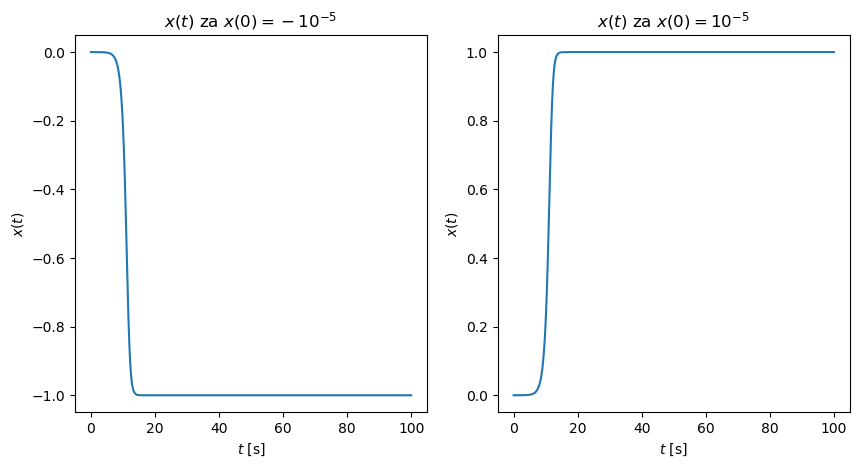

In [15]:
def histerezis(y, t, k):
    return foo(y, k)

plt.figure(figsize=(10,5), dpi=100)
t = np.linspace(0, 100, 2000)
sol = integrate.odeint(histerezis, [-0.00001], t, args=(0,))
sol2 = integrate.odeint(histerezis, [0.00001], t, args=(0,))
plt.subplot(1,2,1)
plt.plot(t, sol[:,0])
plt.title("$x(t)$ za $x(0)=-10^{-5}$")
plt.xlabel("$t$ [s]")
plt.ylabel("$x(t)$")
plt.subplot(1,2,2)
plt.plot(t, sol2[:,0])
plt.title("$x(t)$ za $x(0)=10^{-5}$")
plt.xlabel("$t$ [s]")
plt.ylabel("$x(t)$")
plt.show()

Da li rešenja ulaze u stacionarno stanje? Koliko iznosi stacionarno stanje u jednom, a koliko u drugom slučaju? Da li iz dobijenih rezultata sledi da je stacionarna tačka $x = 0$ privlačnog ili odbojnog karaktera?

Resenja ulaze u stacionarno stanje. U prvom slucaju je to x(t) = -1 , dok je u drugom x(t) = 1. I u jednom i drugom slucaju tacka x = 0 je odbojnog karaktera.

c) Umesto ugrađenih metoda, jednačinu rešiti primenom metode konačnih razlika. Ponoviti grafik iz tačke b) primenom ove metode.

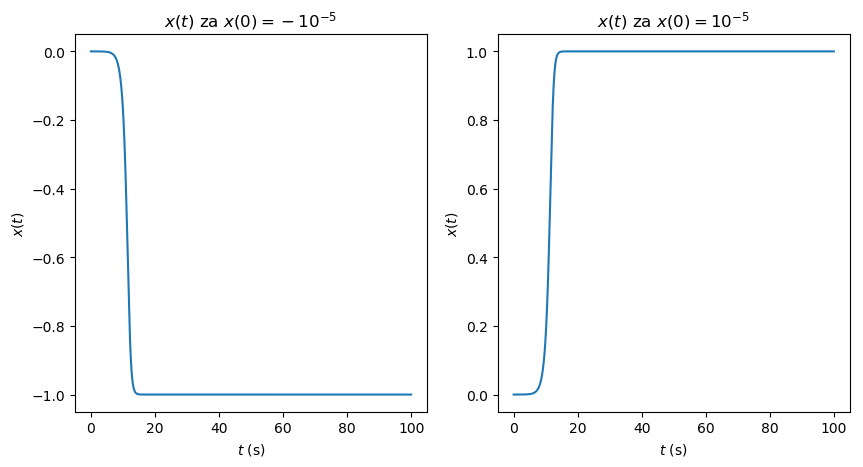

In [16]:
dt = 0.05
a1 = np.zeros((2000))
a2 = np.zeros((2000))
a1[0] = -0.00001
a2[0] = 0.00001
for i in range(1, 2000):
    a2[i] = a2[i-1] + dt * foo(a2[i-1], 0)
    a1[i] = a1[i-1] + dt * foo(a1[i-1], 0)
    
plt.figure(figsize=(10,5), dpi=100)
plt.subplot(1,2,1)
plt.plot(t, a1)
plt.title("$x(t)$ za $x(0)=-10^{-5}$")
plt.xlabel("$t$ (s)")
plt.ylabel("$x(t)$")
plt.subplot(1,2,2)
plt.plot(t, a2)
plt.title("$x(t)$ za $x(0)=10^{-5}$")
plt.xlabel("$t$ (s)")
plt.ylabel("$x(t)$")
plt.show()

d) Korišćenjem definicije <font color='blue'>histerezis</font> rešavati diferencijalnu jednačinu na vremenskom domenu od $0$ do $100$ sekundi u $2000$ ekvidistantnih tačaka, ali za različite vrednosti parametra $k$. Parametar $k$ varirati u rasponu od $-3$ do $3$ u 200 ekvidistantnih tačaka i za svaku vrednost rešiti diferencijalnu jednačinu za dva početna uslova, prvi put za $x(0) = -4$, drugi put za početni uslov $x(0) = 4$. U vektor <font color='blue'>x1</font> u svakoj iteraciji (za svaku vrednost parametra $k$) smeštati stacionarnu vrednost rešenja diferencijalne jednačine dobijenu za prvi početni uslov, a u vektor <font color='blue'>x2</font> smeštati stacionarnu vrednost rešenja diferencijalne jednačine dobijenu za drugi početni uslov. Za stacionarnu vrednost usvajati vrednost za $x$ u dovoljno dalekom vremenskom trenutku za koji se pretpostavlja da nastupilo stacionarno stanje. Na istom grafiku, različitim bojama nacrtati zavisnosti <font color='blue'>x1(k)</font> (punom linijom) i <font color='blue'>x2(k)</font> (isprekidanom linijom). Obeležiti ose grafika i prikazati legendu oznaka. 

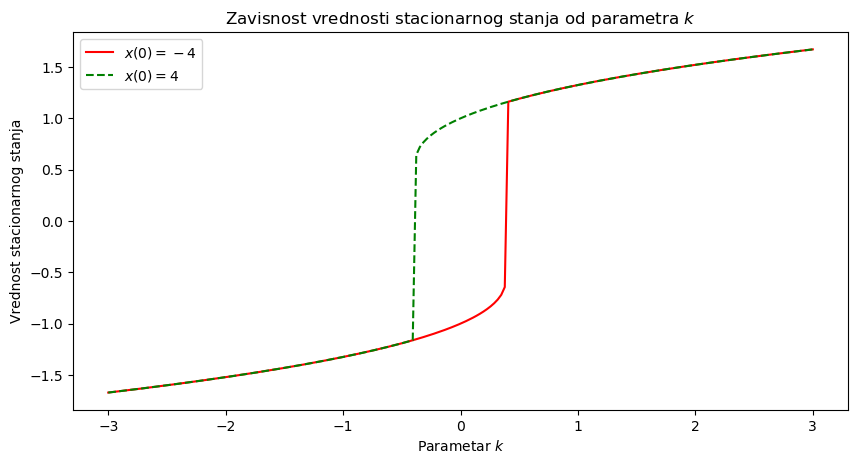

In [17]:
arr_k = np.linspace(-3,3,200)
x1 = []
x2 = []
for i,k in enumerate(arr_k):
    sol = integrate.odeint(histerezis, [-4], t, args=(k,))
    sol2 = integrate.odeint(histerezis, [4], t, args=(k,))
    x1.append(sol[:,0][-1])
    x2.append(sol2[:,0][-1])
plt.figure(figsize=(10,5), dpi=100)
plt.plot(arr_k, x1, 'r', label="$x(0)=-4$")
plt.plot(arr_k, x2, 'g--', label="$x(0)=4$")
plt.legend()
plt.xlabel("Parametar $k$")
plt.ylabel("Vrednost stacionarnog stanja")
plt.title("Zavisnost vrednosti stacionarnog stanja od parametra $k$")
plt.show()

Pomoću faznih dijagrama nacrtanih u tački a) detaljno objasniti dobijenu formu grafika. Objasniti kojom putanjom se dobijeni grafik opisuje u smeru porasta parametra $k$, a kojom putanjom u smeru smanjivanja parametra $k$.

Za vrednosti parametra za koje postoji samo jedno stacionarno stanje, putanje se poklapaju. Na intervalu -$\epsilon$ do $\epsilon$ k zauzima stacionarno stanje koje mu je najblize, a to je stacionarno stanje sa najmanjom x koordinatom. Kada dostigne $\epsilon$ tada naglo prelazi u stacionarno stanje sa najvecom x koordinatom jer je to tada jedino moguce stacionarno stanje. Analogno vazi i za slucaj kada k opada, samo sto u ovom slucaju na intervalu -$\epsilon$ do $\epsilon$ sistem zauzima stacionarno stanje sa najvecom x koordinatom. Odavde zakljucujemo da crvena linija predstavlja rast parametra k , dok zelena predstavlja opadanje